Allison Forte

Assignemnt 5.2: (5.1 & 5.2; 6.1)

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

## Question 5.1
In the BRFSS, the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.

In order to join the BlueMan Group, you have to be male and between 5' 10" and 6' 1" tall. What percent of the US male population is in this range? (hint: use scipy.stats.norm.cdf)

In [153]:
import scipy.stats

mean = 178
standard_deviation = 7.7
heights = scipy.stats.norm(loc = mean, scale = standard_deviation)  # describe distribution

low = 70*2.54  # convert low height to cm
high = 73*2.54  # convert high height to cm

low_calc = heights.cdf(low)  # calculate the low height probability
high_calc = heights.cdf(high)  # calculate the high height probability

range_heights = high_calc - low_calc  # calculate the difference

percent_population = range_heights*100  # turn range_heights into a true percentage

print('{} percent of the population could apply to join BlueMan Group'.format(percent_population))  # 34% could join the group

34.27468376314746 percent of the population could apply to join BlueMan Group


## Question 5.2
To get a feel for the Pareto distribution, let's see how differerent the world would be if the distribution of human height were Pareto. With the parameters xₘ = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and a median, 1.5 m.

Plot this distribution.

In [154]:
alpha = 1.7
xmin = 1  # meter

pareto_heights = scipy.stats.pareto(b = alpha, scale = xmin)

What is the mean human height in Pareto world?

In [155]:
pareto_heights.mean()  # mean height is 2.43 meters

2.428571428571429

What fraction of this population is shorter than the mean?

In [156]:
pareto_heights.cdf(pareto_heights.mean())  # 77.9% of the population is shorter than the mean

0.778739697565288

If there are 7 billion people in Pareto world, how many do we expect to be taller than 1km?

In [157]:
cdf_1km = pareto_heights.cdf(1000)  # chance of being under 1 km

(1 - cdf_1km) * 7000000000  # we would expect about 55,603 people to be taller than 1 km

55602.976430479954

How tall do we expect the tallest person to be?

In [158]:
# to calculate this we would use percent point function to identify the value that one person would reach
pareto_heights.ppf(1 - 1 / 7e9)  # the tallest person would be approximately 618 km tall. 

618349.6106759505

# Question 6.1
The distribution of income is famously skewed to the right. In this exercise, we'll measure how strong that skew is.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from the Census Burea's website. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income and comnverted it to hic06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py which reads this file and transforms the data. 

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income "Under $5000." The highest range includes respondents who made "$250,000 or more."

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range.hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a dataframe with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed uppper boound on the highest range, expressed in log10 dollars. The default value, log_upper = 6.0 represents the assumption that the largest income among the respondents is 10^6, or one million dollars. 

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yeilds the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale. 

In [159]:
# creates a sample of log10 household income. Assumes that log10 income is uniform in each range.
# df: DataFrame with columns income and freq
# log_upper: log10 of the assumed upper bound for the highest range
# returns: NumPy array of log10 household income


def InterpolateSample(df, log_upper=6.0):  
    df['log_upper'] = np.log10(df.income)  # compute the log10 of the upper bound for each range
    df['log_lower'] = df.log_upper.shift(1)  # get the lower bounds by shifting the upper bound and filling in the first element
    df.loc[0, 'log_lower'] = 3.0  # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper  # use the freq column to generate the right number of values in each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)
    log_sample = np.concatenate(arrays)  # collect the arrays into a single sample
    return log_sample


def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)


def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)


def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k


def Mean(xs):
    return RawMoment(xs, 1)


def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)


def Skewness(xs):
    return StandardizedMoment(xs, 3)


def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [164]:
import hinc
import thinkstats2
import thinkplot
import numpy as np

income_df = hinc.ReadData('code/hinc06.csv')
log_sample = InterpolateSample(income_df, log_upper = 6.0)

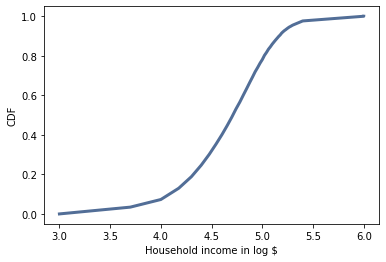

In [165]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income in log $', ylabel='CDF')

In [166]:
sample = np.power(10, log_sample)

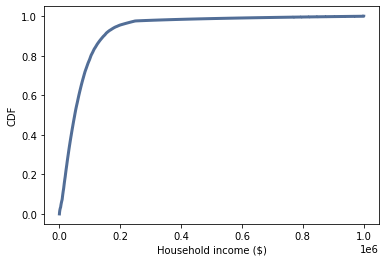

In [167]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)', ylabel='CDF')

Compute the median, mean, skewness, and Pearson's skewness of the resulting sample.

In [168]:
median = Median(sample)
mean = Mean(sample)
skewness = Skewness(sample)
pearson_skewness = PearsonMedianSkewness(sample)

print('The median of the sample is {}. \nThe mean of the sample is {}.'.format(median, mean))
print('The skewness of the sample is {}. \nThe Pearson Skewness is {}.'.format(skewness, pearson_skewness))

The median of the sample is 51226.45447894046. 
The mean of the sample is 74278.70753118733.
The skewness of the sample is 4.949920244429583. 
The Pearson Skewness is 0.7361258019141782.


What fraction of households reports a taxable income below the mean?

In [121]:
percent_below_mean = cdf.Prob(mean)*100
print('Approximately {}% of households report a taxable income below the mean.'.format(percent_below_mean))

Approximately 66.0005879566872% of households report a taxable income below the mean.


How do the results depend on the assumed upper bound?

The answers here assume the upper bound for income is 1 million dollars. This upper bound is established in the InterpolateSample function by the passed arguement log_upper = 6.0

If we changed the upper bound to 1 billion dollars (log_upper = 9) we would see the median remain the same but the mean drastically increase to 2929881 with a skewness of 17.5 and a Pearson Skewness of .22 

On the other hand, changing the upperbound to only 100,000 dollars, we would again see the same median along with a mean reduced to 65308 with skewness of 1.17 and Pearson Skewness of .81